# Principal Component Analysis

- #### It's a type of unsupervised learning algorithm.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

![Training Steps](pca.png)

## PCA Class 

In [16]:
class PCA:
    
    def __init__(self, num_components):
        self.num_components = num_components
        self.mean = None
        self.principal_components = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        #Compute covariance
        #np.cov() takes samples as samples so make sure to Transpose it.
        cov = np.cov(X.T)
        
        #Compute the EigneVectors , EigenValues 
        eigenvectors , eigenvalues = np.linalg.eig(cov)
        
        #Take transpose of eigenvectors as the eigenvectors is a column vector
        eigenvectors = eigenvectors.T
        
        #Sort the eigenvectors
        idxs = np.argsort(eigenvalues)[::-1] #EigenVectors will be sorted in a decreasing order.
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        #Take Vectors upto the defined number
        self.principal_components = eigenvectors[:self.num_components]
        
    def transform(self, X):
        X = X -self.mean
        
        #Project the data
        return np.dot(X, self.principal_components.T)
    
    
        

## Algorithm Inference

In [10]:
data  = datasets.load_iris()
X, y = data.data, data.target
labels= data.target_names

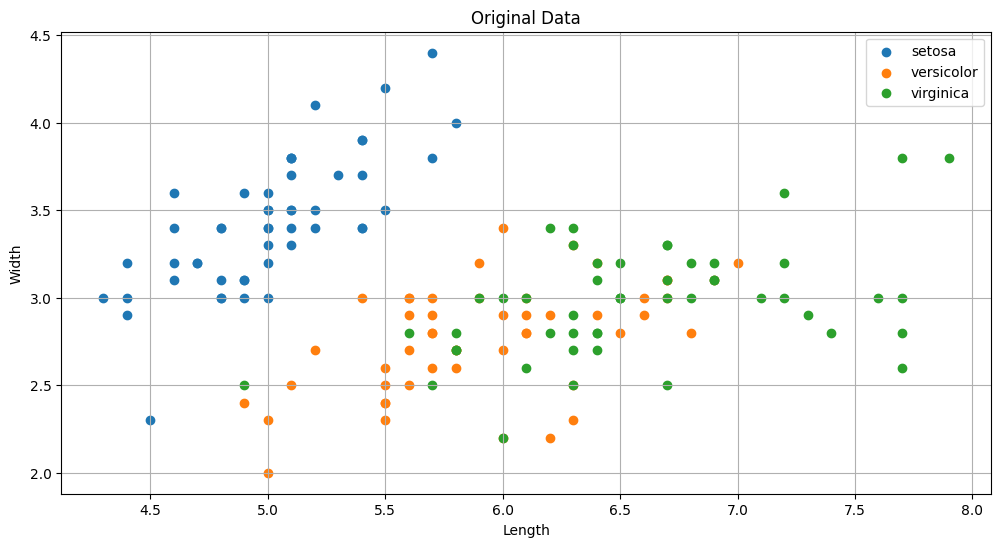

In [11]:
plt.figure(figsize=(12,6))
for i in np.unique(y):
    plt.scatter(X[y == i , 0], X[y==i , 1], label = labels[i])
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Original Data")
plt.legend()
plt.grid(True)
plt.show()

- Project the data onto 2 principal components

In [17]:
pca = PCA(num_components=2)
pca.fit(X)
X_projected = pca.transform(X)


In [21]:
print("="*28, f"Shape of X before PCA: {X.shape}" , "="*28)
print("="*28, f"Shape of X after PCA: {X_projected.shape}", "="*28)

============================ Shape of X before PCA: (150, 4) ============================
============================ Shape of X after PCA: (150, 2) ============================


- As you can see in the above output block we reduced the number of features from 4 to 2

- #### Result Visualization

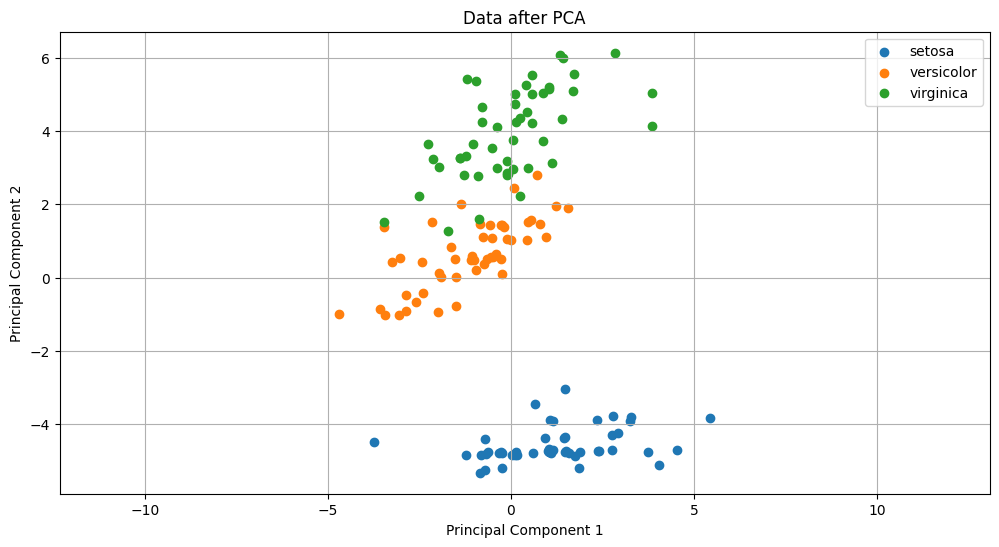

In [19]:
plt.figure(figsize=(12,6))
for i in np.unique(y):
    plt.scatter(X_projected[y == i, 0], X_projected[y == i, 1], label=labels[i])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data after PCA")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()